# 理解椭圆函数加密（初等内容介绍）

今年年初看到了一篇有意思的文章,介绍一个简单的数学题
![math problem](fword_math_problem_1200x500.jpg)
其实这个题目比较小的整数解如下，呵呵：

a=154476802108746166441951315019919837485664325669565431700026634898253202035277999,
b=36875131794129999827197811565225474825492979968971970996283137471637224634055579,
c=4373612677928697257861252602371390152816537558161613618621437993378423467772036

文中介绍使用椭圆函数解决问题，真心体会到椭圆函数的强大。最近也在捣鼓椭圆加密相关的知识，也查了一些资料，基本的感觉就是懵。
![what_ec](what_ec.jpg)

基本上在网上找不到一篇比较好的中文介绍椭圆函数入门的文章，所以就想自己从外面搬运整合写一篇同时也巩固一下自己学到的东西。为了让此文更加容易看懂，我把需要的一些基础知识同样包含在此文中，比如关于群、环、域的基础知识，还有就是要提醒一下椭圆函数与你中学学的圆锥剖面曲线族（椭圆，双曲线，抛物线）没有半毛钱关系。群、环、域本身的内容非常丰富，此文只包含需要知道的一些内容，理解椭圆函数的初等内容并不需要了解抽象代数中的高级内容（不过群理论是描述一切对称性的精确理论，个人觉得群论是最能体现数学之美的一个分支，如果有兴趣绝对值得花时间学习一下）。


### 一、群、环、域
一个不空集合A和集合上一个运算$\ast$,如果满足下面的三条规则则称为**群**:

   1. $a,b,c \in A,(a \ast b ) \ast c = a \ast (b \ast c)$
   
   2. $ \exists e \in A, \forall a \in A,e \ast a = a \ast e =a $
   
   3. $ \forall a \in A, \exists a^{-1} \in a ,a \ast a^{-1} = a^{-1} \ast a = e $
    
其中第一条是说集合在运算下满足结合律，第二条是说存在一个单位元在运算之下保持元素不变，第三条是说每个元素都存在它的逆元在运算下得到单位元。如果满足上面三条同时再满足运算可交换，即:
    $$ \forall a,b \in A, a \ast b = b \ast a$$
那么群就是可交换群，即**阿贝尔群**,一般阿贝尔群的群运算符号我们写为+，群单位元写成0方便记忆。群有几个基础的特征需要熟悉一下，群里的单位元是唯一的，群里元素的逆元可能是元素本身，比如单位元的逆元就是它本身，群集合的大小可能是任意正整数也可能是无穷大（可数无穷和不可数无穷都可能）。群集合中的元素是任意的，除了常见的数字，也可能是某些操作变换本身，而群的运算就可能是某种元操作，比如某些函数组成的群，操作可能是函数的复合。群这个数学工具非常通用，元素可能是各种对象，这一点一定要注意。
    
仅仅靠群规则定义理解群是很难的，可以通过几个例子再看一下可以体会更深一些，有几个例子在本文后面还会继续用到。群$G1:(\{0\},+)$,这个群仅仅有一个元素0，运算是整数加法，当然换成整数乘法也可以。群$G2:(\{0,1\}, \verb|^|)$,其中$0 \verb|^| 0=0,0 \verb|^| 1=1 \verb|^| 0=1,1 \verb|^| 1=0$。其中运算就是逻辑异或运算。群$Z_n:(Z_n,+)$,其运算是整数上的加法之后对n取模，元素是比n小的自然数，密码学里n一般是素数的幂或是两个不同素数的积。群($Z/Z_n,\times)$,运算是乘积之后对n取模，同样密码学里n一般是素数的幂或是两个不同素数的积，这个群中元素只有和n互素并且比n小的自然数。

分析一个例子$Z_{15}$,15=3*5，元素是{0,1,2,3,4,5,6,7,8,9,10,11,12,13,14},可以很容易看出来其中的元素1反复施加群运算可以得到整个群的元素，如果某个群存在一个元素g,反复施加群运算得到g,2g,3g,...,一直下去可以得到整个群元素，这样的群叫做循环群，这样能生成群里所有元素的元素叫生成元，可以把这个群记为$<g>$。

一个群元素个数称为群的**阶**,记为$|G|$,一个非常有用的结论是如果一个群的阶是一个素数p,那么这个群肯定是个循环群。群$Z_n$都是循环群，阶为n的循环群一般记为$C_n$,如果我们可以把$Z_{15}$里的每个元素都反复施加群运算，看看结果，代码如下：

In [7]:
groupTable = {}
for i in range(15):
    groupTable[i] = []
    acc = 0
    for _ in range(15):
        acc += i
        acc %= 15
        if acc not in groupTable[i]:
            groupTable[i].append(acc)
for g in iter(groupTable.keys()):
    print('(g={0})->{1}'.format(g,groupTable[g]))

(g=0)->[0]
(g=1)->[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0]
(g=2)->[2, 4, 6, 8, 10, 12, 14, 1, 3, 5, 7, 9, 11, 13, 0]
(g=3)->[3, 6, 9, 12, 0]
(g=4)->[4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 0]
(g=5)->[5, 10, 0]
(g=6)->[6, 12, 3, 9, 0]
(g=7)->[7, 14, 6, 13, 5, 12, 4, 11, 3, 10, 2, 9, 1, 8, 0]
(g=8)->[8, 1, 9, 2, 10, 3, 11, 4, 12, 5, 13, 6, 14, 7, 0]
(g=9)->[9, 3, 12, 6, 0]
(g=10)->[10, 5, 0]
(g=11)->[11, 7, 3, 14, 10, 6, 2, 13, 9, 5, 1, 12, 8, 4, 0]
(g=12)->[12, 9, 6, 3, 0]
(g=13)->[13, 11, 9, 7, 5, 3, 1, 14, 12, 10, 8, 6, 4, 2, 0]
(g=14)->[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


可以明显看出来，除0,5,6,9,10,12以外的元素，通过反复运算都可以生成原来的群本身，而那些不能生成群本身的元素所生成的集合也是一个群，这样以原群元素子集为元素，采用相同运算生成的群叫原群G的子群，当然群G本身和只由单位元组成的群是原群的子群，称为平凡子群，当群是有限群时 子群的阶都是原群阶的因子，把原群的阶与子群的阶的比称为子群的**指数**(cofactor)比如可以看出与n互素的那些数都是原群的生成元。把一个群元素反复和自己运算，把使$g^k=0$的最小正整数k称为元素的阶，这个阶等于这个元素生成的循环子群的阶。下面再看三个乘法模运算的群结构，$(Z/Z_{14},\times),(Z/Z_{15},\times)和(Z/Z_{17},\times)$

$(Z/Z_{14},\times)=\{1,3,5,9,11,13\}$

$(Z/Z_{15},\times)=\{1,2,4,7,8,11,13,14\}$

$(Z/Z_{17},\times)=\{1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17\}$

尝试以每个元素做为生成元，计算一下生成的子群，结果如下：

In [36]:
def calcG(G,mod):
    gTable = {}
    for i in G:
        gTable[i] = [i]
        mul = i
        for _ in range(len(G)):
            mul *= i
            mul %= mod
            if mul not in gTable[i]:
                gTable[i].append(mul)
    for g in iter(gTable.keys()):
        print('(g={0})->{1}'.format(g,gTable[g]))

#calcG14()
G14 = [1,3,5,9,11,13]
G15 = [1,2,4,7,8,11,13,14]
G17 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
print('group G14 test generator')
calcG(G14,14)
print('group G15 test generator')
calcG(G15,15)
print('group G17 test generator')
calcG(G17,17)


group G14 test generator
(g=1)->[1]
(g=3)->[3, 9, 13, 11, 5, 1]
(g=5)->[5, 11, 13, 9, 3, 1]
(g=9)->[9, 11, 1]
(g=11)->[11, 9, 1]
(g=13)->[13, 1]
group G15 test generator
(g=1)->[1]
(g=2)->[2, 4, 8, 1]
(g=4)->[4, 1]
(g=7)->[7, 4, 13, 1]
(g=8)->[8, 4, 2, 1]
(g=11)->[11, 1]
(g=13)->[13, 4, 7, 1]
(g=14)->[14, 1]
group G17 test generator
(g=1)->[1]
(g=2)->[2, 4, 8, 16, 15, 13, 9, 1]
(g=3)->[3, 9, 10, 13, 5, 15, 11, 16, 14, 8, 7, 4, 12, 2, 6, 1]
(g=4)->[4, 16, 13, 1]
(g=5)->[5, 8, 6, 13, 14, 2, 10, 16, 12, 9, 11, 4, 3, 15, 7, 1]
(g=6)->[6, 2, 12, 4, 7, 8, 14, 16, 11, 15, 5, 13, 10, 9, 3, 1]
(g=7)->[7, 15, 3, 4, 11, 9, 12, 16, 10, 2, 14, 13, 6, 8, 5, 1]
(g=8)->[8, 13, 2, 16, 9, 4, 15, 1]
(g=9)->[9, 13, 15, 16, 8, 4, 2, 1]
(g=10)->[10, 15, 14, 4, 6, 9, 5, 16, 7, 2, 3, 13, 11, 8, 12, 1]
(g=11)->[11, 2, 5, 4, 10, 8, 3, 16, 6, 15, 12, 13, 7, 9, 14, 1]
(g=12)->[12, 8, 11, 13, 3, 2, 7, 16, 5, 9, 6, 4, 14, 15, 10, 1]
(g=13)->[13, 16, 4, 1]
(g=14)->[14, 9, 7, 13, 12, 15, 6, 16, 3, 8, 10, 4, 5, 2, 11,

我们分析一下上面的结果，对于$Z/Z_{n}$来说，其中的元素是与n互素且比n小的那些正整数，元素数量记为$\phi(n)$，显然当n是素数p时，$\phi(p)=p-1$,对于群中任意元素a,$a^{\phi(n)}=1$,称为**欧拉定理**，是费马小定理的推广，费马小定理是欧拉定理n为素数p时的情况，即$a^{p-1}=1$。对于$Z/Z_{14}$来说，其中元素是以元素3和5都能生成原来的群，而其它元素不行，这样的元素称为**原根**。而$Z/Z_{15}$中不存在这样的元素，它没有原根，显然存在原根的模n乘法群是循环群，同时如果一个模n乘法群是循环群就一定存在原根，所以$Z/Z_n$当n是素数时原根必然是存在的。

在群中元素g用群运算操作k次得到a,就是$g^k=a$,当已知g和a来求k时，把k记为$k=ind_g(a)$,k称为离散对数，求解这样的问题称为离散对数问题，一般在密码学里面我们使用的g都是原根集合中的元素，这样会非常方便，对于非常大的n，除非有特殊性质的(n,g,a)组合，通常求解离散对数问题非常的困难，但是正向计算$g^k$和验证某个k满足$a=g^k$并不困难。

如果对于阿贝尔群(G,+),其中除元素对另一种运算$\ast$满足交换率和结合率，并且也存在新运算下的单位元（这个单位元可与+运算单位元相同也可以不同，通常是不同的，如果相同集合就只能是单元素集），那么这样的双重结构称为**环**（如果新运算去掉交换率，那么就是非交换环，密码学里一般不会用到这个东西，这里我们不考虑它）。
如果环上的元素在新运算下除原阿贝尔群单位元外，在新运算下形成交换群$(G\backslash{0},\times)$（也就是说每个元素都有逆元），那么就称新的代数结构为域。在域中为了方便，我们一般把加法群元素b的逆元记为-b,所以a+(-b)直接记为a-b,而乘法群的逆元记为$b^{-1}$,$a\times b^{-1}$记为$a/b$。我们在密码学里关心的域都是有限元素的，有限域通常记为$F_{p^{k}}$,其中k是正整数，p是素数。域中的元素是小于$p^{k}$且与$p^{k}$互素的那些自然数，加法和乘法运算是模$p^{k}$的运算，我们通过两个例子体会一下有限域：

$F_5=\{0,1,2,3,4\}$

$F_{25}=\{0,1,2,4,6,7,8,9,11,12,13,14,16,17,18,19,21,22,23,24\}$

$F_5$中的元素与其逆元配对$(a,a^{-1})$为(1,1),(2,3),(4,4)

$F_{25}$中元素与其逆元配对$(a,a^{-1})$为，(1,1),(2,13),(3,17),(4,19),(6,21),(7,18),(8,22),(9,14),(11,16),(12,23),(24,24)

对于$F_p$中乘法群的元素，除1和p-1之外，其它元素与其逆是一一配对的,在$F_{p^k}$中寻找元素的乘法逆元并不复杂，使用扩展欧几里得算法可以很方便的找到逆元，对于本文中比较小的有限域就直接搜索测试全部元素寻找逆元更加方便。域中元素满足两种运算，这样一般就方便我们组成多元有理分式$F=\frac{f(a,b,...)}{g(a,b,...)}$，只要分母不为零，运算后的元素依旧处在域中，域在有理多元分式中对分母不为零的分式运算封闭，这个特性让它在编码和密码学中应用起来特别方便。

如果对于群$(G,\times)$和$(G^{'},\ast)$，如果存在一个G到G'的一一映射$f$,满足$f(g_1 \times g_2)=f(g_1) \ast f(g_2)$,那么就说G与G'**同构**，$G \cong G^{'}$。同构的特点是群G中的单位元映射到了G'中的单位元并且G与G'有相同的元素数量，除元素不同和运算不同之外，G与G'的元素一一对应，连运算后的结果都一一对应，完全等效于把元素和运算重新命名了一下而已，群的结构和性质完全是等价的。

对于两个群G和G'来说，可以定义一种运算称为**直积**，元素为(g,g'),基中$g \in G,g' \in G'$,定义合成运算规则为(h,h')(k,k')=(hk,h'k')。可以验证集合{(g,g'),$g \in G,g{'} \in G^{'}$}在合成运算下构成群。称这样的群为原来的群G和G‘直积群，记为$G \times G'$,我们在本文中用到的直积都是循环群直积。一般的结论是一般两个循环群的直积不一定是个循环群，比如可以验证$C_2 \times C_2 \neq C_4$,因为$C_2 \times C_2$中根本不存在阶为4的元素。当GCD(m,n)=1时，也就是说m与n互素时，$C_{mn}=C_m \times C_n$。

### 二、椭圆函数
在介绍椭圆函数之前首先了解一下立方函数，$f(X,Y)=aX^3+bX^{2}Y+cXY^2+dY^3+eX^2+fXY+gY^2+hX+iY+j$,f(X,Y)描述的是三维空间中的一个三次曲面，如果g(X,Y)也是三维空间中三次曲面并且与f(X,Y)没有面重合的部分，那么一般情况下两曲面在三维空间中形成一个交线曲线，这条曲线在X,Y坐标平面的投影就是f(X,Y)=g(X,Y)确定的方程,对于满足$Y^2=X^3+aX^2+bX+c$这样的曲线称为椭圆函数，我们在密码学里面用的椭圆函数比这个更加简单，最多使用的形式是$Y^2=X^3+aX+b$,称为魏尔斯特拉斯形式，它基本保留了非常一般形式曲线的重要特性，在密码学中一般我们使用它就够了。
下图是取自维基百科的图，不同参数情况下椭圆函数的曲线样式（曲线上点的域为实数域）：
![EC_curve_diff_params](784px-EllipticCurveCatalog.svg.png)

此时的曲线还不能称为完整的椭圆曲线，我们要加入一个无穷远点$\mathbb{O}$,这个无穷远点不是随便取的，它处在与X轴垂直的方向上，当你做一条与X轴垂直的直线时，我们规定直线与$\mathbb{O}$点相交。

$\Delta=-16(4a^3+27b^2)$称为椭圆函数的判别式,判别式的来源是仿射几何的内容，不用关心其中的细节。当判别式不为零时曲线称为非奇异的，非奇异的曲线的特征就是当你取曲线上两点做一条直线时，它一定与曲线相交另一点且仅相交于这一点（比如你在曲线上找与X轴对称的两点做直线，就与我们规定的无穷远点相交)，当你取曲线上任一点做切线时，它也必和曲线交于另一点且仅相交于这一点，显然这样规定之后与曲线有交点的直线必与曲线有三个且仅有三个交点（其中两点重合时为切线)。

下面我们在非奇异椭圆函数上设计一个加运算+，这个运算的规则非常简单，就是曲线上共线的三个点的和为零(0,0),无穷远点的坐标为零(0,0)

![EC_plus_op](File_ECClines_plus_op.png)

设计这样的运算之后如上图，如果PQ与x轴垂直，那么P+Q+0=0,就是P+Q=0,也就是说Q=-P,这样我们就得到了-P的定义,它与与P关于X轴对称的那一个点。P+0+(-P)=0，也就是说P+0=P。这里给出一个不加证明的结论，如果按照我们上面定义的加法规则，这个加法满足结合律，就是在非奇异椭圆曲线上的任意三点P,Q,R有，(P+Q)+R=P+(Q+R),这个结论非常不显然而且这个结论是椭圆函数可以广泛应用的核心原因之一，你如果有兴趣可以自己用代数方式计算验证这个结论，当然这是个比较机械比较麻烦的事情。这个定理成立的根本原因是立方函数构造的仿射几何，在这个几何中如果两个没有公共部分的两个立方函数C1和C2相交构成的曲线为C，在这个曲线上随便找不同的9个点，如果另一个立方函数C'与这9个点中的8个相交，那么这个C'也必过另外一个点，这个定理称为9点定理。椭圆函数上的定义的直线加法满足结合率的原因就是这个9点定理的推论。我这里给出另外一个定理与之类比，帮助理解，就是椭圆上的帕斯卡定理,椭圆上不同的六个点，如下图连线得到的三个交点共线。

![pascal theorem](500px-Pascaltheorem.png)

根据上面的加法定义，椭圆曲线上的点自然形成了一个加法阿贝尔群。下面我们来推导一下椭圆曲线上的加法计算公式， 

我们假设曲线上P1,P2和R共线，坐标分别为$P1(x_1,y_1),P2(x_2,y_2),R(x_R,y_R)$,当过P1与P2的直线不与X轴垂直时它的方程为$y=kx+m$,当然P1+P2=-R。两种一般的情况为：当P1与P2为同一点，并且切线不与X轴垂直时，切线的斜率为$k=\frac{3x_1^2+a}{2y_1}$,当P1，P2为不同的点，直线斜率为$k=\frac{y_2-y_1}{x_2-x_1}$。把直线$y=kx+m$代入原椭圆曲线消去y之后得到$(kx+m)^2=x^3+ax+b$,我们已经知道$x_1,x_2,x_r$为其根,所以这个关于x的方程为:$(x-x_1)(x-x_2)(x-x_r)$,比较$x^2$的系数得到$x_r=k^2-(x_1+x_2)$,所以整个我们就很容易得到下面的分类结果:


* 当P1$\neq$P2且$x_1=x_2$时:P1+P2=$\mathbb{O}$
* 当P1=P2，且$y_1=0$时，也就是说切线与X轴垂直时，$P1+P2=\mathbb{O}$
* 当P1$\neq$ P2且不与X轴垂直$(x_1\neq x_2)$时，$P1+P2=(k^2-(x_1+x_2),-k^3+k(x_1+x_2)-m),其中k=\frac{y_2-y_1}{x_2-x_1},m=\frac{y_1 x_2-x_1 y_2}{x_2-x_1}$
* 当P1=P2，且$y_1\neq 0$时，也就是P1与曲线相切但不与X轴垂直时，$P1+P2=(k^2-(x_1+x_2),-k^3+k(x_1+x_2)-m)，其中k=\frac{3x_1^2+a}{2y_1},m=\frac{-x_1^3+ax_1+2b}{2y_1}$


以上是根据实数域上代数运算得到的结果，对于有限域以上的结论也是一样的，那么对于有限域椭圆曲线就是一些点的集合，在有限域下椭圆曲线的点集长什么样呢？结论就是椭圆曲线完全失去了几何形象，由几乎就是坐标平面上看起来非常随机分散的一些点，除了对称性之外完全看不出任何曲线或是其它规律。对称性成立的原因是椭圆函数左侧是$y^2$,当y满足条件时，在$Z_p$中,(p-y)当然也会是满足条件的。下面我们以曲线$y^2=x^3-5x+8$在有限域$F_{37}$上为例，分析其图像和元素。

order=45,points:[(0, 0), (1, 2), (1, 35), (5, 16), (5, 21), (6, 3), (6, 34), (8, 6), (8, 31), (9, 10), (9, 27), (10, 12), (10, 25), (11, 10), (11, 27), (12, 14), (12, 23), (16, 18), (16, 19), (17, 10), (17, 27), (19, 1), (19, 36), (20, 8), (20, 29), (21, 5), (21, 32), (22, 1), (22, 36), (26, 8), (26, 29), (28, 8), (28, 29), (30, 12), (30, 25), (31, 9), (31, 28), (33, 1), (33, 36), (34, 12), (34, 25), (35, 11), (35, 26), (36, 7), (36, 30)]


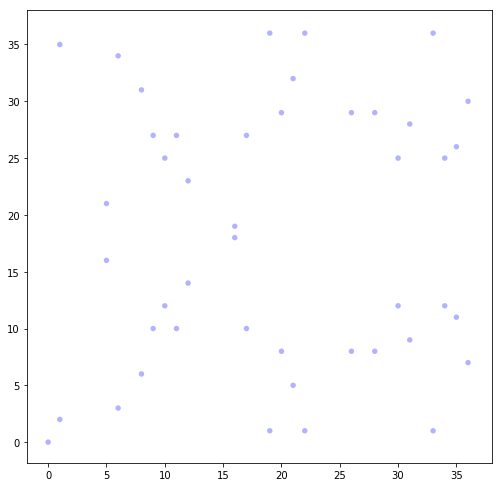

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
def EC_define(a,b,mod):
    return lambda x:(x**3+a*x+b) % mod
def EC_curve_f(x,curve,mod):
    yList = []
    y2 = curve(x)
    for i in range(mod-1):
        y = i+1
        if y**2 % mod == y2:
            yList.append(y)
    return yList
    
def getCurvePoints(a,b,p):
    ec_curve = EC_define(a,b,p)
    field = list(np.arange(p-1)+1)
    pointSet = [(0,0)]
    for v in field:
        yList = EC_curve_f(v,ec_curve,p)
        for y in yList:
            pointSet.append((v,y))
    return pointSet
def find_inverse_in_Fp(a,p):
    for i in range(p-1):
        if a * (i+1) % p == 1:
            return i+1
def Fp_divide(a,b,p):
    # calculate a/b in Fp
    b_inv = find_inverse_in_Fp(b,p)
    return a*b_inv % p
def curveAdd(a,b,mod,p1,p2):
    curve = EC_define(a,b,mod)
    (x1,y1) = p1
    (x2,y2) = p2
    #print(p1,p2)
    k = None
    m = None
    if x1==0 and y1 ==0:
        return p2
    elif x2==0 and y2 ==0:
        return p1
    elif x1==x2 and y1!=y2:
        return (0,0)
    elif x1==x2 and y1==y2 and y2==0:
        return (0,0)
    elif x1==x2 and y1==y2:
        k = Fp_divide(3*x1**2+a,2*y1,mod)
        m = Fp_divide(-x1**3+a*x1+2*b,2*y1,mod)
    elif x1!=x2:
        k = Fp_divide(y2-y1,x2-x1,mod)
        m = Fp_divide(y1*x2-x1*y2,x2-x1,mod)
    return ((k**2-(x1+x2)) % mod,(-(k**3)+k*(x1+x2)-m) % mod)


points = getCurvePoints(-5,8,37)
print('order={0},points:{1}'.format(len(points),points))
fig, ax = plt.subplots()
DPI = fig.get_dpi()
fig.set_size_inches(600.0 / float(DPI), 600.0 / float(DPI))
for (x,y) in points:
    ax.scatter(x, y, c='blue', s=30.0, label='blue',
                   alpha=0.3, edgecolors='None')

这个椭圆函数构成的群与$C_3\times C_{15}$同构，在有限域上的椭圆曲线有一个非常强的定理：**任意有限域上的椭圆函数要么与一个循环群同构，要么与两个循环群的直积同构**。我们获取并绘制其中一个元素(1,2)生成的循环子群，用红色把其标示出来,同时也在另一张图中标示出生成的点的轨道顺序。这个子群一共15个元素，可以看到子群并不存在对称性而且轨道显得非常随机和混乱，找不到规律。当椭圆曲线上的点非常多时，计算椭圆曲线群的阶当然不是把有的点都取出来数，存在一个高效的算法计算椭圆曲线群的阶称为**Schoof's算法**。

size=15,generated points=[(1, 2), (26, 29), (22, 36), (11, 10), (36, 7), (34, 25), (5, 21), (5, 16), (34, 12), (36, 30), (11, 27), (22, 1), (26, 8), (1, 35), (0, 0)]


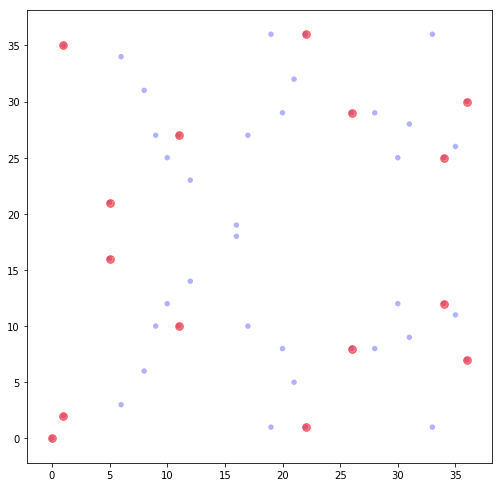

In [38]:
p1 = (1,2)
p1GSet = [p1]
add = p1
for _ in range(45):
    add = curveAdd(-5,8,37,p1,add)
    if add not in p1GSet:
        p1GSet.append(add)
print('size={0},generated points={1}'.format(len(p1GSet),p1GSet))
fig, ax = plt.subplots()
DPI = fig.get_dpi()
fig.set_size_inches(600.0 / float(DPI), 600.0 / float(DPI))
for (x,y) in points:
    ax.scatter(x, y, c='blue', s=30.0, label='blue',
                   alpha=0.3, edgecolors='none')
for (x,y) in p1GSet:
    ax.scatter(x, y, c='red', s=60.0, label='red',
                   alpha=0.5, edgecolors='Red')

size=15,generated points=[(1, 2), (26, 29), (22, 36), (11, 10), (36, 7), (34, 25), (5, 21), (5, 16), (34, 12), (36, 30), (11, 27), (22, 1), (26, 8), (1, 35), (0, 0)]


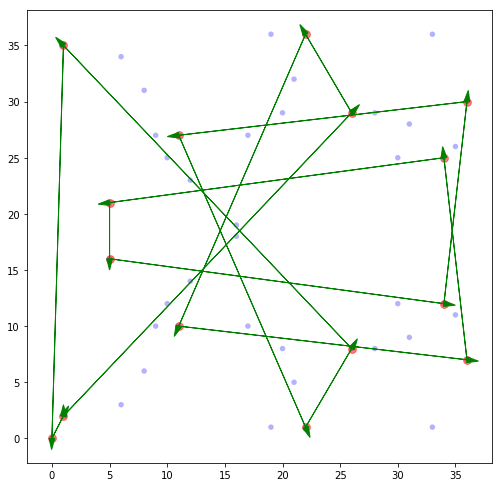

In [54]:
p1 = (1,2)
p1GSet = [p1]
add = p1
for _ in range(45):
    add = curveAdd(-5,8,37,p1,add)
    if add not in p1GSet:
        p1GSet.append(add)
print('size={0},generated points={1}'.format(len(p1GSet),p1GSet))
fig, ax = plt.subplots()
DPI = fig.get_dpi()
fig.set_size_inches(600.0 / float(DPI), 600.0 / float(DPI))
for (x,y) in points:
    ax.scatter(x, y, c='blue', s=30.0, label='blue',
                   alpha=0.3, edgecolors='none')
prevPoint = p1
for (x,y) in p1GSet:
    ax.arrow(prevPoint[0], prevPoint[1], x-prevPoint[0], y-prevPoint[1], head_width=0.5, head_length=1, fc='g',ec='g')
    prevPoint = (x,y)
    ax.scatter(x, y, c='red', s=60.0, label='red',
                   alpha=0.5, edgecolors='Red')
ax.arrow(prevPoint[0],prevPoint[1],p1[0]-prevPoint[0],p1[1]-prevPoint[1],head_width=0.5, head_length=1, fc='g',ec='g')

### 离散对数(DLP)和椭圆函数离散对数(ECDLP)问题
上面我们已经介绍了离散对数问题，求解群G上一般性的$ind_g^a$的问题的复杂性和群本身的结构关系非常密切，此类问题称为**DLP问题**。一般对于有限域$F_p$,我们定义数值p表示成2进制数字之后的长度为位长，单位为bit，用#p表示。比如128=1000 0000，为8bits。那么一般乘法群$(Z/Z_p,\times)$上的离散对数问题目前最好的算法计算复杂性为$\mathbf{O} (e^{c\sqrt[3]{\#p log(\#p)}})$，这是针对位长的一个亚指数复杂度的算法。而针对椭圆函数群上的一般离散对数问题目前已知的最好的解法算法复杂度为$\mathbf{O}\sqrt{e^{\#p}}$，这是一个纯指数复杂度的算法。我们把一个正向计算比较容易（复杂性在多项式范围内）而反向计算（函数是一一映射，反函数一定存在）困难（超越多项式复杂性）的函数称为**单向门函数**。理论上是不是存在完全完美的单向门函数我们不得而知，但是我们可以设计由一定复杂性保护的单向门函数，其中DLP和ECDLP就是这样的函数，加密安全性就是受到这种计算复杂性的保护，椭圆函数上的加密算法一般都严重依赖ECDLP问题。这里提一下另一种函数，称为**单向陷阱门函数**，这种函数的特点是有一个后门称为私有信息，同样的正向计算很容易，反向计算很困难，但是如果你知道这个后门私有信息,那么反向计算就很容易。比较常用的是素数分解问题：n=pq,p和q是差不多大而且都非常大（一般要256bits以上)的素数，如果你知道p和q来计算n非常容易，但是如果只知道n，来分解质因子得到p和q就面临复杂性很高的计算问题。

### DH和ECDH密钥交换算法
Diffie–Hellman密钥交换算法是Ralph Merkle提出概念并由Whitfield Diffie and Martin Hellman实现最早设计并以他们命名的公钥体系密钥交换算法。这个算法设计本身不复杂，我在维基百科找到一张使用颜色混合来形象描述DH算法原理的图：
![explain DH](427px-Diffie-Hellman_Key_Exchange.svg.png)

在一个公开的通讯信道上Alice和Bob准备通过协商交换出一个私有的共享对称密钥，首先Alice和Bob在公开信道上商量一种公开的颜色的底液(这个类似选择共同使用的群结构的参数)，之后Alice和Bob都在自己这里选择一种私有的颜色之后各自把颜色与底液混合，把混合后的液体通过公开信道交换给对方，之后各方再把得到的来自对方的混合液与各自之前的选择的私有颜色液体混合，因为混合的都是相同的颜色只是顺序不同，最终得到相同的私有最终颜色。对于观察通讯信道的人知道的信息有底液，各自混合后交换的液体，如果观察者不能通过混合液体和底液分析出私有颜色，它将不能获得最终的共享颜色。DH算法这里面最重要的两点是混合顺序不影响最终颜色和知道混合颜色不能分离出原来的单色。

通过以上非常形象的图示，就很容易看懂DH密钥交换算法了。首先Alice和Bob在公开信道商议接下来交换算法使用的群G和生成员g。Alice和Bob分别生成自己的随机数a和b并分别计算$g^a$和$g^b$,Alice和Bob在公开信道互换计算得到的结果$g^a$和$g^b$，对Alice来说，她需要计算$S=(g^b)^a=g^{ab}$,对Bob来说他需要计算$S=(g^a)^b=g^{ab}$,现在Alice和Bob得到了共享的私有密钥$S$,公开信道的监听人Eve得到的信息包括$(G,g,g^a,g^b)$,如果Eve想要得到共享密钥，他必须解决离散对数问题，也就是说这个共享密钥受到计算离散对数复杂性的保护。

### ECDSA签名算法
签名算法的基本模式是Alice生成一个密钥对，一个私钥($d_A$)和一个公钥($H_A$), 私钥自己私有用来对消息进行签名，公钥公开让任何人可以用来验证签名是由Alice私钥对此消息签发，其中公钥是对所有人公开的，任何人都可以轻易获取到它。这里需要一个散列函数Hash,用来把消息m稳定映射到一个$Z_p$上，$z = Hash(m)$。
**生成签名**的算法的工作流程如下:
* 首先确定一个椭圆函数C,假设C的阶为p,生成元为点g
* 随机在范围[1,2,...,p-1]范围内选择一个比较大的数做为$d_A$,在椭圆曲线群上计算$H_A=d_A g$
* 对于任意消息计算$z = Hash(m)$
* 随机在[1,2,...,p-1]范围内选择一个数k，计算$P = k g,r=x_P$，其中r为P点的x坐标
* 如果r=0,那么重新选择一个k，重复相关的步骤重新计算r
* 计算$s=k^{-1}(z+rd_A)$ mod p,这个步骤主要目的是将私钥和消息耦合起来，当我知道私钥$d_A$、s和k时，可唯一的把消息散列$z$计算出来
* 如果$s = 0$,重新选择一个k重复上面的步骤
获得的二元组$(r,s)$就是签名结果

**验证签名**的算法如下:
* 计算$u_1=s^{-1} z $ (mod p)
* 计算$u_2=s^{-1} r $ (mod p)
* 计算$P = u_1 g+ u_2 H_A$
如果$r=x_P $ (mod p)，那没签名验证通过

这个算法的正确性推导很简单:
$$ P = (u_1 g +u_2 H_A)$$
$$ = s^{-1} z g + s^{-1} r d_A g $$
$$ = s^{-1}(z+r d_A) g $$
$$ = k (z+r d_A)^{-1} (z+r d_A) g $$
$$ = k g = P$$

理解这个算法的设计思路关键步骤在于设计$s=k^{-1}(z+rd_A)$,这个在$(Z/Z_p,\times)$中的操作把私钥$d_A$，消息$z$、一个随机数k三者的信息混合进去，这也就是为什么签名结果中包含了与随机数k相关的信息r，而这个r与随机数k之间相关联的桥梁是ECDLP问题，如果我们知道随机数k,那么再根据s的值和s的定义可以很容易计算出私钥$d_A$，如果不知道随机数k，那么只能通过求解ECDLP问题来计算得到k,也就是说这个签名算法受到求解ECDLP问题复杂性的保护。注意每次调用签名算法k是随机生成的，也就是说每次对同一个消息签名得到的签名结果并不相同，但是验证过程都是使用同一个公钥验证，这个没有问题。

ECDSA算法有一个潜在的安全问题是不能反复使用同一个k进行签名，否则私钥将会被计算出来，我们来看一个经典的案例：

索尼在之前发布的PlayStation 3游戏机上内置了游戏正版验证机制，也就是说只有游戏机验证安装的游戏是索尼公司的私钥正确签名过的才能启动游戏，其签名算法就是ECDSA算法，但是索尼在在使用过程中犯了一个严重的错误:**他们经常使用同一个k来签名不同的游戏**。

假如我们购买两个不同的正版游戏得到散列消息$z_1$和$z_2$，并得到签名信息$(r_1,s_1),(r_2,s_2)$，我们使用下面的方法计算出索尼的私钥$d_A$:

* 因为两次签名是相同的，所以$P=k g,r=x_P$,所以$r_1=r_2$
* 计算$s_1-s_2$ (mod p) = $k^{-1} (z_1-z_2)$，注意到这里面消去了$rd_A$这个私有量,这很关键
* 直接在$(Z/Z_p,\times)$中计算出k
现在我们根据上面介绍的方法根据k计算出私钥$d_A$，实际上并不一定要错误的反复使用同个k，只要每次生的k存在某个已知的关联，例如随机数发生器不是满足密码学要求的随机数之类的问题，我们都有机会构造一个算法来消去未知量$rd_A$,从而恢复出来私钥$d_A$。

### 实际系统
上面的介绍只是在非常小的曲线上展示示例，实际应用系统中对曲线的选择异常苛刻，因为拥有奇特特性的曲线是可能存在巨大的安全弱点的，比如当椭圆曲线的阶和椭圆曲线使用的有限域的阶相等时，存在一个多项式时间计算复杂性的算法解决这个的曲线上的离散对数问题。一般工业加密算法选择的曲线是固定的一组供用户选择。比如RFC7748中的Curve448，有限域p=2^448 - 2^224 - 1,A=156326,B=5,阶为

2^446-0x8335dc163bb124b65129c96fde933d8d723a70aadc873d6d54a7bb0d

指数为4，
生成元横坐标为:
$g_x=$35529392678556817526412750206378333480897639938771427183188089843516
9088786967410002932673765864550910142774147268105838985595290606362


### 总结
因为计算机的发展速度是符合摩尔定律的也就是说计算机的速度随着时间在指数级别增强，而传统加密依赖的数学算法：如$Z_p$上的DH问题，大数质因子分解问题等都是随着选择的密钥长度亚指数级别增强计算复杂度。那么为了维持密码不被破解我们需要随着时间推移超线性增加密钥的长度，这给加密和解密过程都带来了巨大的计算量也就增加了加密和解密的时间延迟，在互联网如此普及和关键的今天增加延迟对某些关键应用是不可接受的。但是基于椭圆函数的算法的破解复杂性是随密钥长度指数增加的，也就是说随着计算机性能的增强，只要随着时间推移线性的增加密钥长度就可以达到同等级别的加密强度，这样椭圆曲线的密钥长度会比传统算法短很多，计算压力比传统算法小很多。例如256-bit密钥长度的基于椭圆曲线公钥体系差不多和3072-bit密钥长度基于RSA公钥体系的安全强度一致。同时随着云计算的普及，在云上如果内部加密算法都迁移到基于椭圆曲线的安全体系上来，因为计算规模巨大而带来的计算资源节约将是异常可观的，估计未来几年基于椭圆曲线的安全体系会逐步替换之前的传统算法。

### 参考

[1] Cryptography Engineering: Design Principles and Practical Applications(Niels Ferguson , Bruce Schneier , Tadayoshi Kohno)

[2] Rational Points on Elliptic Curves (Joseph H. Silverman , John T. Tate )

[3] Elliptic Curve Cryptography: a gentle introduction (http://andrea.corbellini.name/2015/05/17/elliptic-curve-cryptography-a-gentle-introduction/)

[4] Elliptic Curves for Security rfc7748 (https://datatracker.ietf.org/doc/rfc7748/?include_text=1)

[5] A (Relatively Easy To Understand) Primer on Elliptic Curve Cryptography (https://blog.cloudflare.com/a-relatively-easy-to-understand-primer-on-elliptic-curve-cryptography/)

[6] Elliptic-curve cryptography (https://en.wikipedia.org/wiki/Elliptic-curve_cryptography)

[7] Elliptic curve (https://en.wikipedia.org/wiki/Elliptic_curve)

[8] Pascal's theorem (https://en.wikipedia.org/wiki/Pascal%27s_theorem)

[9] 史上最贱的数学题 （https://zhuanlan.zhihu.com/p/33853851)

[10] An Introduction to the Theory of Elliptic Curves  (https://www.math.brown.edu/~jhs/Presentations/WyomingEllipticCurve.pdf)